In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

https://wntkdl94.tistory.com/50 나이 결측치
https://kimdingko-world.tistory.com/159 랜덤 포레스트
https://data-newbie.tistory.com/350?category=805962
http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=c610f934b0b76d29ffe0bdc3ef48d419&outLink=K 결측치대체 논문

In [2]:
df = pd.read_csv('dataset/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [4]:
df.drop(['ticket','body','home.dest','boat'],axis=1,inplace=True)

In [5]:
name_grade = df['name'].apply(lambda x : x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt', 'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev', 'Ms']


In [6]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의합니다.
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성(민자인듯..?)을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

# 정의한 호칭의 기준에 따라, A~F의 문자로 name 피처를 다시 정의하는 함수입니다.
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'
    
# 위의 함수를 적용하여 name 피처를 새롭게 정의합니다.
df['name'] = df['name'].apply(lambda x: give_grade(x))
print(df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64


<AxesSubplot:xlabel='age'>

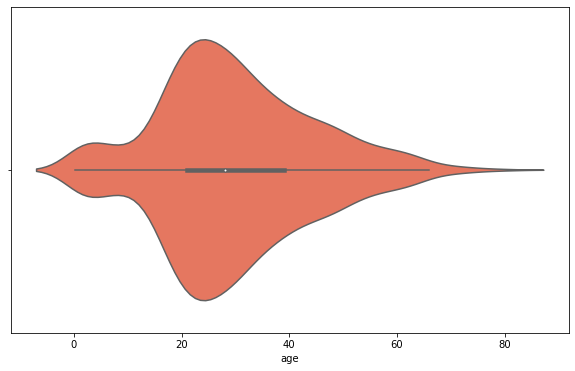

In [7]:
# violinplot을 이용해 대체를 포함한 데이터와 원래 있던 데이터의 분포를 살펴보고 비슷한지 비교함.
plt.figure(figsize=(10,6))
sns.violinplot(df.age,palette='Reds')

In [8]:
for i in df.name:
    df.age[(df.name == i)&(df.age.isnull())] = df.age[df.name == i].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


<AxesSubplot:xlabel='age'>

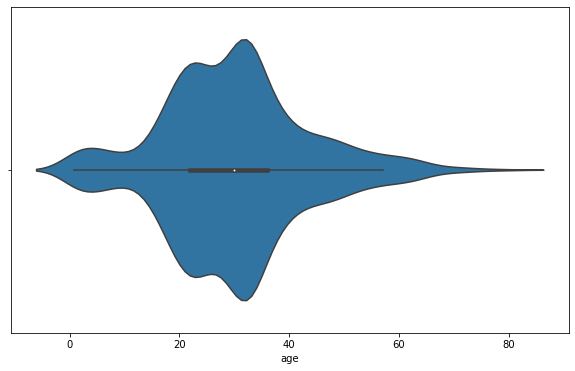

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(df.age)

In [10]:
df['cabin'].value_counts()[:10]

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
B96 B98            4
D                  4
C22 C26            4
F2                 4
C78                4
Name: cabin, dtype: int64

In [11]:
# 결측 데이터를 pcalss 별로 'X','Y','Z'로 부여
df.loc[(df.pclass == 1)&(df.cabin.isnull()),'cabin'] = 'X'
df.loc[(df.pclass == 2)&(df.cabin.isnull()),'cabin'] = 'Y'
df.loc[(df.pclass == 3)&(df.cabin.isnull()),'cabin'] = 'Z'


# cabin의 첫 번째 문자를 추출해 대표로 함.
df['cabin'] = df['cabin'].apply(lambda x: x[0])
df['cabin'].value_counts()

Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: cabin, dtype: int64

In [12]:
# embarked 2개의 결측값을 최빈값으로 대체합니다.
embarked_many = df['embarked'].value_counts().index[0]
df['embarked'] = df['embarked'].fillna(embarked_many)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   cabin     1309 non-null   object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [13]:
# fare는 pclass의 영향이 크므로, 같은 클래스 안에서 분포를 확인
df.fare[df.pclass==3].describe()

count    708.000000
mean      13.302889
std       11.494358
min        0.000000
25%        7.750000
50%        8.050000
75%       15.245800
max       69.550000
Name: fare, dtype: float64

In [14]:
# 평균으로 대체해도 무방할 것으로 판단, 평균값으로 대체
df.loc[df.fare.isnull(),'fare'] = df.fare[df.pclass==3].mean()

In [15]:
df['family'] = df.sibsp + df.parch
df = df.drop(['sibsp','parch'],axis=1)
df

,pclass,survived,name,sex,age,fare,cabin,embarked,family
0,1,1,F,female,29.000000,211.3375,B,S,0
1,1,1,E,male,0.920000,151.5500,C,S,3
2,1,0,F,female,2.000000,151.5500,C,S,3
3,1,0,D,male,30.000000,151.5500,C,S,3
4,1,0,B,female,25.000000,151.5500,C,S,3
...,...,...,...,...,...,...,...,...,...
1304,3,0,F,female,14.500000,14.4542,Z,C,1
1305,3,0,F,female,21.918263,14.4542,Z,C,1
1306,3,0,D,male,26.500000,7.2250,Z,C,0
1307,3,0,D,male,27.000000,7.2250,Z,C,0


In [16]:
# def get_age(age):
#     cat=''
#     if age<5:cat='BABY'
#     elif age<15:cat='Kid'
#     elif age<20:cat='Minor'
#     elif age<40:cat='Young_adult'
#     elif age<60:cat='Adult'
#     else:cat='Elder'
#     return cat
# data.age = data.age.apply(get_age)
# data

In [17]:
# 정규화를 함에 있어, zscore가 minmaxscale보다 이상치에 영향이 적다고 함
def zscore(a):
    return (a - df.fare.mean())/df.fare.std()
df.fare = df.fare.apply(zscore)
df

,pclass,survived,name,sex,age,fare,cabin,embarked,family
0,1,1,F,female,29.000000,3.441264,B,S,0
1,1,1,E,male,0.920000,2.285768,C,S,3
2,1,0,F,female,2.000000,2.285768,C,S,3
3,1,0,D,male,30.000000,2.285768,C,S,3
4,1,0,B,female,25.000000,2.285768,C,S,3
...,...,...,...,...,...,...,...,...,...
1304,3,0,F,female,14.500000,-0.363845,Z,C,1
1305,3,0,F,female,21.918263,-0.363845,Z,C,1
1306,3,0,D,male,26.500000,-0.503562,Z,C,0
1307,3,0,D,male,27.000000,-0.503562,Z,C,0


In [18]:
def zscore(a):
    return (a - df.age.mean())/df.age.std()
df.age = df.age.apply(zscore)
df

,pclass,survived,name,sex,age,fare,cabin,embarked,family
0,1,1,F,female,-0.069031,3.441264,B,S,0
1,1,1,E,male,-2.197391,2.285768,C,S,3
2,1,0,F,female,-2.115531,2.285768,C,S,3
3,1,0,D,male,0.006766,2.285768,C,S,3
4,1,0,B,female,-0.372216,2.285768,C,S,3
...,...,...,...,...,...,...,...,...,...
1304,3,0,F,female,-1.168077,-0.363845,Z,C,1
1305,3,0,F,female,-0.605800,-0.363845,Z,C,1
1306,3,0,D,male,-0.258521,-0.503562,Z,C,0
1307,3,0,D,male,-0.220623,-0.503562,Z,C,0


In [19]:
data = pd.get_dummies(df)

In [20]:
data.to_pickle('./dataset/data_20220123.pkl')

In [21]:
df.drop('name',axis=1,inplace=True)
df1 = pd.get_dummies(df)
df1.to_pickle('./dataset/df1_20220123.pkl')

In [22]:
df = pd.read_pickle('./dataset/data_20220123.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   fare        1309 non-null   float64
 4   family      1309 non-null   int64  
 5   name_A      1309 non-null   uint8  
 6   name_B      1309 non-null   uint8  
 7   name_C      1309 non-null   uint8  
 8   name_D      1309 non-null   uint8  
 9   name_E      1309 non-null   uint8  
 10  name_F      1309 non-null   uint8  
 11  sex_female  1309 non-null   uint8  
 12  sex_male    1309 non-null   uint8  
 13  cabin_A     1309 non-null   uint8  
 14  cabin_B     1309 non-null   uint8  
 15  cabin_C     1309 non-null   uint8  
 16  cabin_D     1309 non-null   uint8  
 17  cabin_E     1309 non-null   uint8  
 18  cabin_F     1309 non-null   uint8  
 19  cabin_G     1309 non-null  

In [23]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_df = df['survived'] # 종속변수
X_df = df.drop('survived',axis=1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=11)

print(X_train.shape)
print(X_test.shape)

(1047, 26)
(262, 26)


In [24]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test,rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'rf 정확도 : {accuracy_rf}, lr 정확도 : {accuracy_lr}')

rf 정확도 : 0.8, lr 정확도 : 0.84
